<a href="https://colab.research.google.com/github/irfannhkm/PCVK_GANJIL_24-25/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 6 – Histogram, Histogram Equalization, Dithering
<hr>

||
|----------------|--------------------------|
|Nama:|Muhammad Irfan Nur Hakim |
|Kelas:          |TI-3F  |
|NIM:          |2241620230|
|Absen:          |`15`|

<h3 align="left">Connect with me:</h3>
<p align="left">
<a href="https://github.com/irfannhkm/PCVK_GANJIL_24-25" target="blank"><img align="center" src="https://raw.githubusercontent.com/rahuldkjain/github-profile-readme-generator/master/src/images/icons/Social/github.svg" alt="irfan.nhkm" height="30" width="40" /></a>

[LINK GITHUB](https://github.com/irfannhkm/PCVK_GANJIL_24-25)

### 1. Buka Google Colab, kemudian import folder yang ada di Drive Anda.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

### 3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg).

In [ ]:
original_img = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

def histogram_image(img, title):
    image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    channels = cv.split(image_rgb)

    colors = ['red', 'green', 'blue']

    # Membuat plot untuk histogram
    plt.figure(figsize=(20, 5))
    plt.suptitle(title, fontsize=16)

    # Looping untuk setiap channel
    for i, (channel, color) in enumerate(zip(channels, colors)):
        hist = cv.calcHist([channel], [0], None, [256], [0, 256])

        plt.subplot(1, 3, i + 1)
        plt.bar(np.arange(256), hist[:, 0], color=color[0], width=1)
        plt.title(f"{color.capitalize()} Channel")
        plt.xlim([0, 256])
        plt.xlabel('Intensitas Warna')
        plt.ylabel('Jumlah Kemunculan')

    # Menyesuaikan layout
    plt.tight_layout()
    plt.show()


# Menampilkan gambar original lena
cv2_imshow(original_img)

# Menampilkan gambar histogram lena
histogram_image(original_img, "Histogram RGB Plot")

### 4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

> Iya, output yang dihasilkan sama, hal tersebut karena fungsi menghitung histogram dari keduanya menggunakan gambar yang sama, sehingga hasilnya pun sama walaupun library nya berbeda.

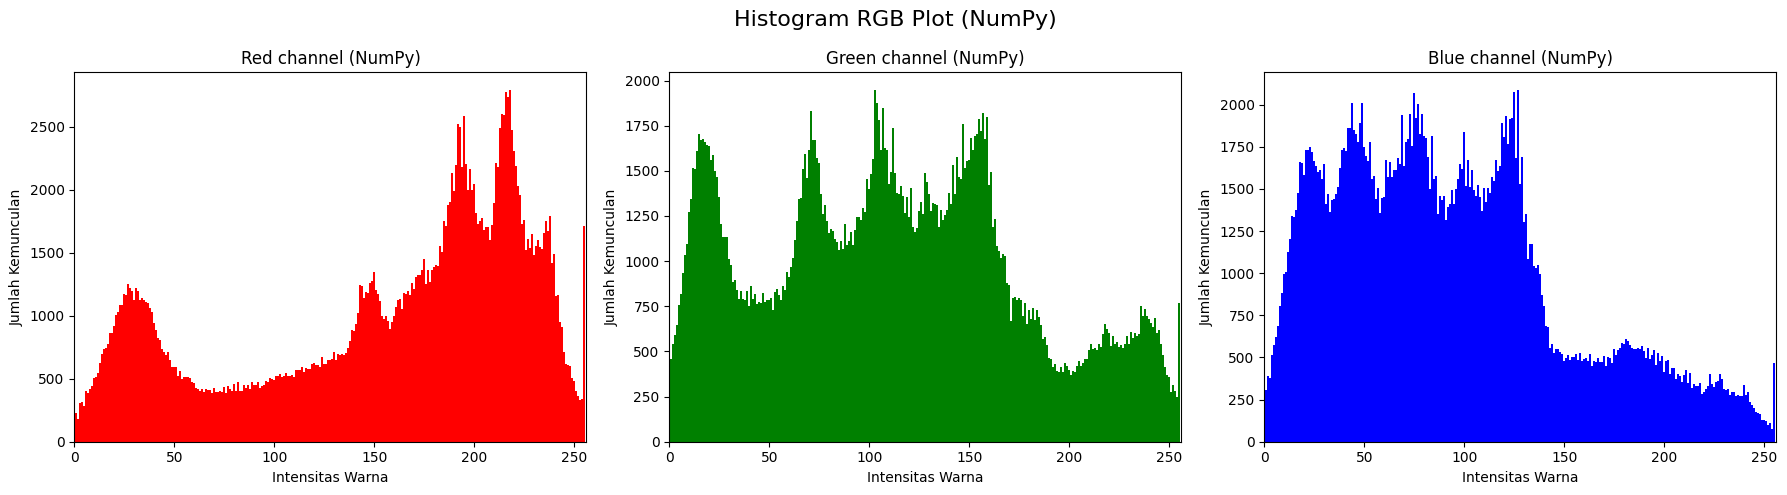

In [34]:
def numpy_histogram_image(img, title):
# Cek apakah gambar grayscale atau RGB
    if len(img.shape) == 2:  # Gambar grayscale
        # Hitung histogram untuk gambar grayscale
        hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])

        # Plot histogram grayscale
        plt.figure(figsize=(6, 5))
        plt.bar(bins[:-1], hist, color='gray', width=1)
        plt.suptitle(title, fontsize=16)
        plt.xlim([0, 256])
        plt.xlabel('Intensitas Warna')
        plt.ylabel('Jumlah Kemunculan')
        plt.tight_layout()
        plt.show()

    else:  # Gambar RGB
        # Mengonversi gambar dari BGR ke RGB
        image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        # Step 2: Menghitung histogram menggunakan NumPy untuk tiap channel
        r_hist_np, r_bins = np.histogram(image_rgb[:, :, 0], bins=256, range=(0, 256))
        g_hist_np, g_bins = np.histogram(image_rgb[:, :, 1], bins=256, range=(0, 256))
        b_hist_np, b_bins = np.histogram(image_rgb[:, :, 2], bins=256, range=(0, 256))


        channels = [
            (r_hist_np, r_bins, 'r', 'Red channel (NumPy)'),   # Red channel
            (g_hist_np, g_bins, 'g', 'Green channel (NumPy)'), # Green channel
            (b_hist_np, b_bins, 'b', 'Blue channel (NumPy)')   # Blue channel
        ]

        plt.figure(figsize=(18, 5))
        plt.suptitle(title, fontsize=16)

        for i, (hist, bins, color, title) in enumerate(channels):
            plt.subplot(1, 3, i + 1)  # Membuat subplot untuk setiap channel
            plt.bar(bins[:-1], hist, color=color, width=1)
            plt.title(title)
            plt.xlim([0, 256])
            plt.xlabel('Intensitas Warna')
            plt.ylabel('Jumlah Kemunculan')

        plt.tight_layout()
        plt.show()

# Menampilkan gambar histogram lena menggunakan numpy
numpy_histogram_image(original_img, "Histogram RGB Plot (NumPy)")

### 5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg).

In [36]:
lena_lc = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

# Pisahkan channel R, G, B
r_channel, g_channel, b_channel = cv.split(lena_lc)

# Hitung histogram untuk setiap channel (256 bin, intensitas 0-255)
r_hist = cv.calcHist([r_channel], [0], None, [256], [0, 256])
g_hist = cv.calcHist([g_channel], [0], None, [256], [0, 256])
b_hist = cv.calcHist([b_channel], [0], None, [256], [0, 256])

# Menghitung histogram gabungan
histogram_array = np.bincount(lena_lc.flatten(), minlength=256)

# Normalisasi histogram
num_px = np.sum(histogram_array)
normalized_histogram = histogram_array / num_px

# Menghitung CDF
cdf = np.cumsum(normalized_histogram)

# Buat transformasi
transform_map = np.floor(255 * cdf).astype(np.uint8)

# Menerapkan transformasi ke gambar
img_list = list(lena_lc.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), lena_lc.shape)


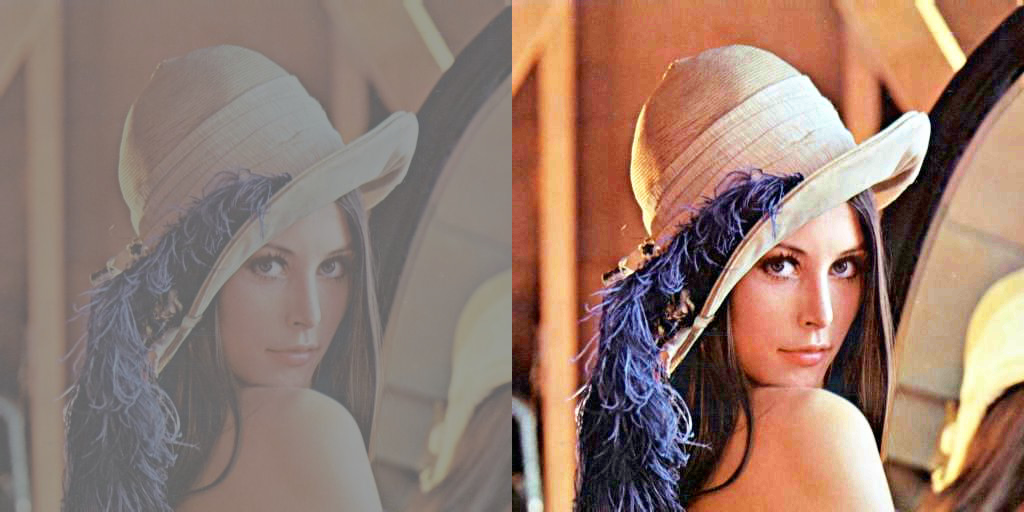

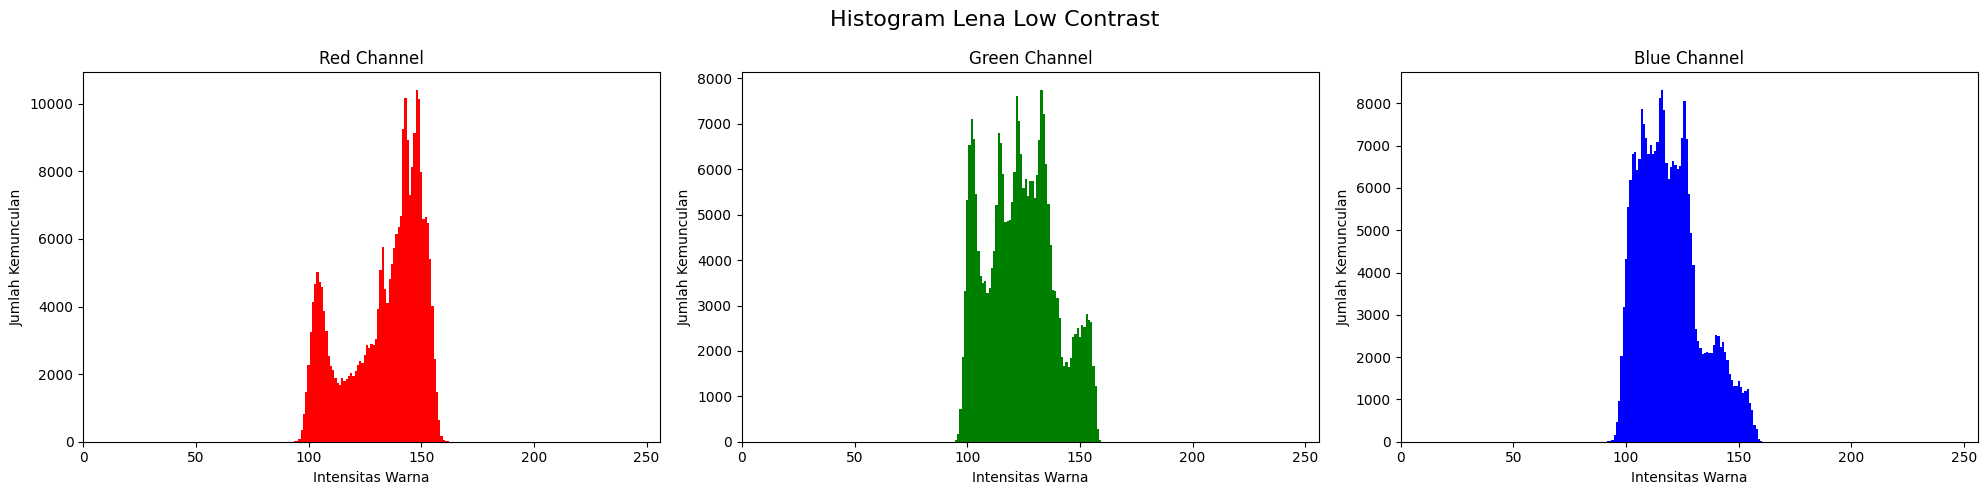

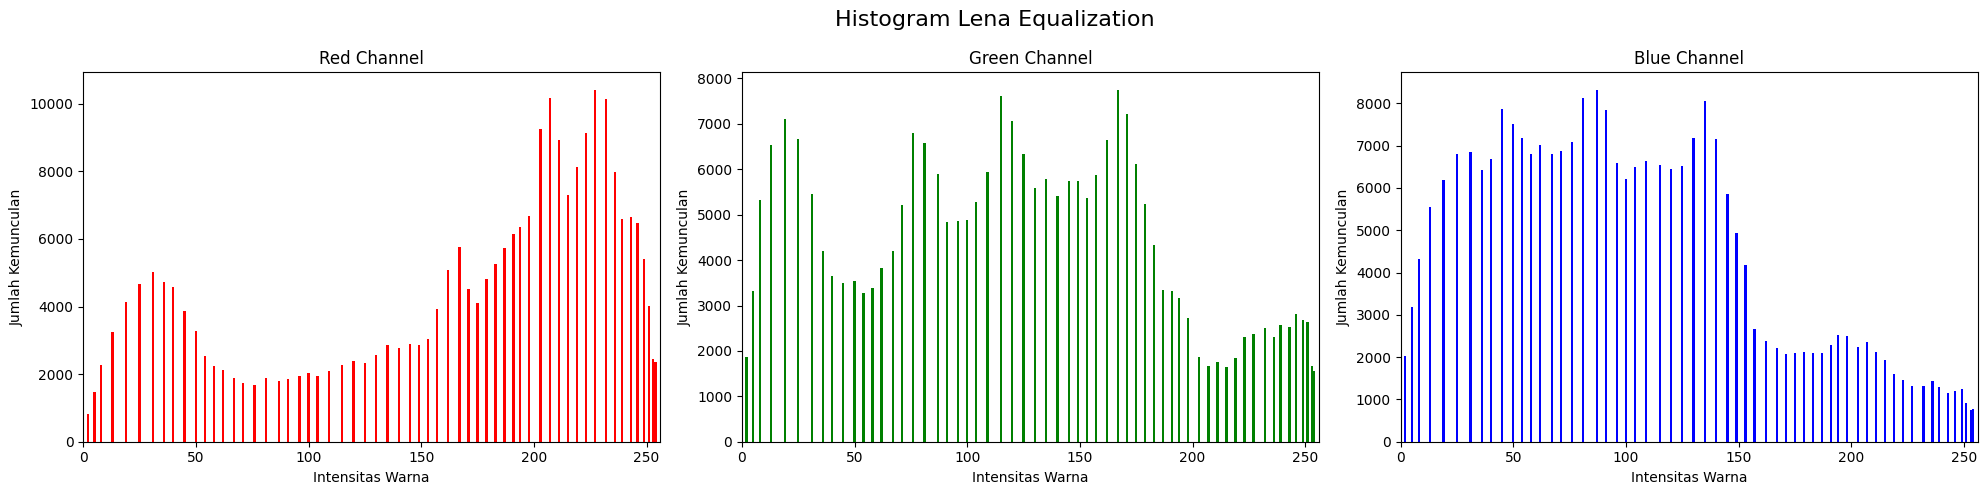

In [35]:
final_frame = cv.hconcat([lena_lc, eq_img_array])
cv2_imshow(final_frame)

# Menampilkan gambar histogram lena low contrast
histogram_image(lena_lc, "Histogram Lena Low Contrast")

# Menampilkan gambar histogram lena equalization
histogram_image(eq_img_array, "Histogram Lena Equalization")

### 6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

> Hasil yang terjadi yaitu outputnya berbeda, jika menggunakan cara yang manual pada langkah 5 itu hasilnya lebih mendekati ke gambar originalnya, tetapi jika menggunakan cv.equalizeHist itu hasilnya lebih cenderung ke biru-biruan dan intensitas warna pada blue channel tersebar tetapi di cenderung ke pinggir-pinggir seperti pada hasil langkah 6 berikut:

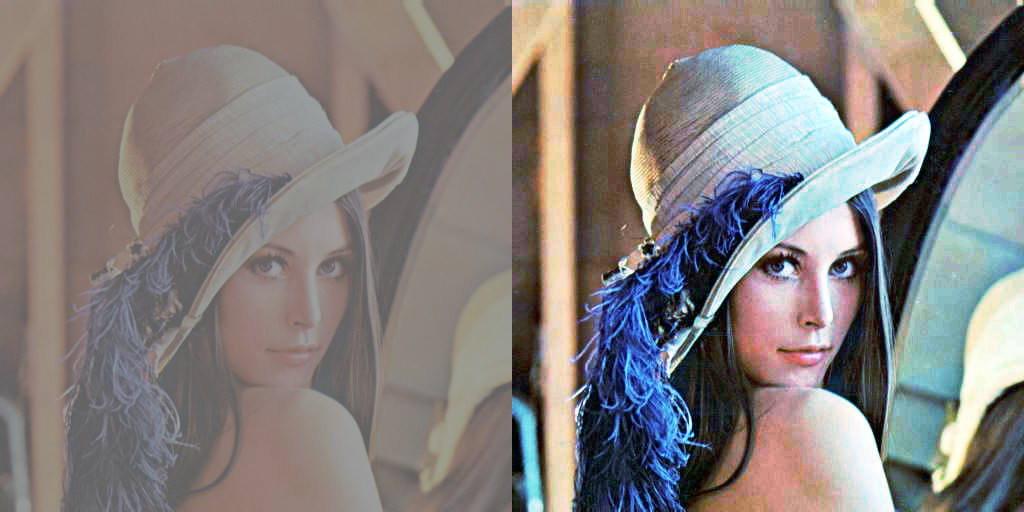

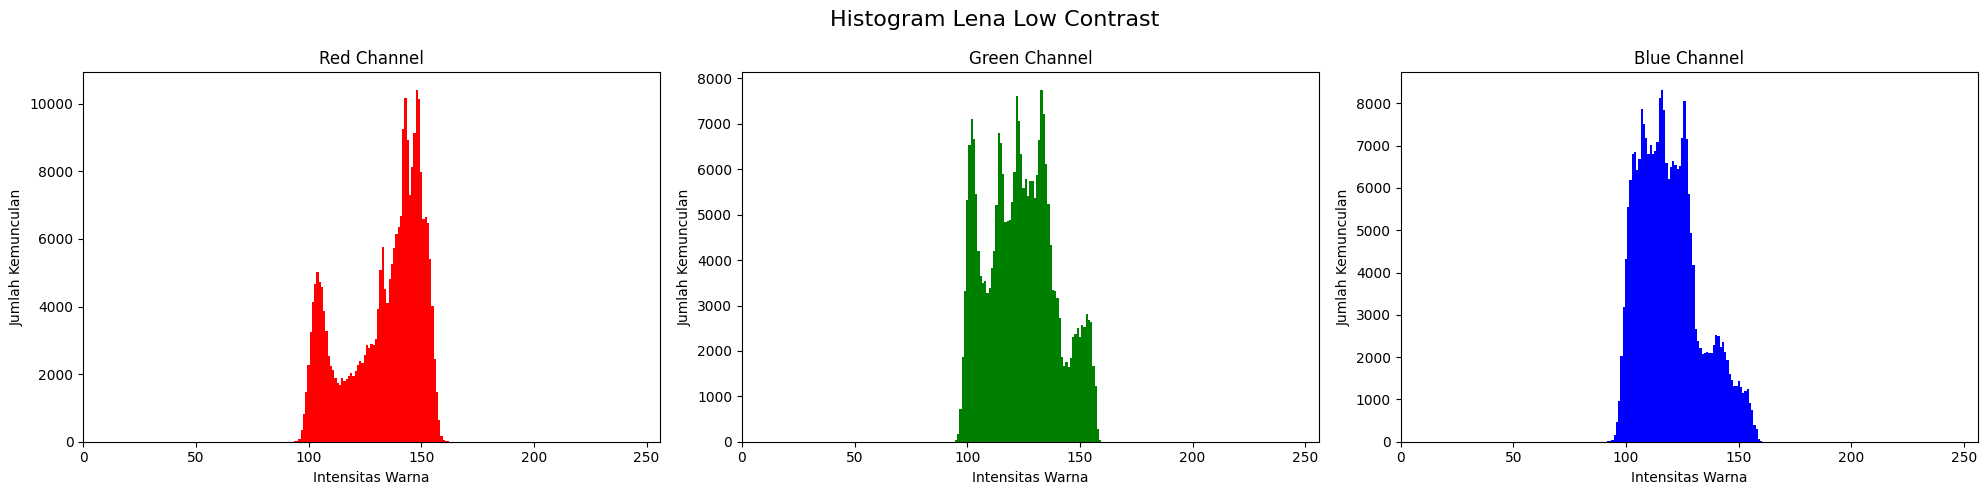

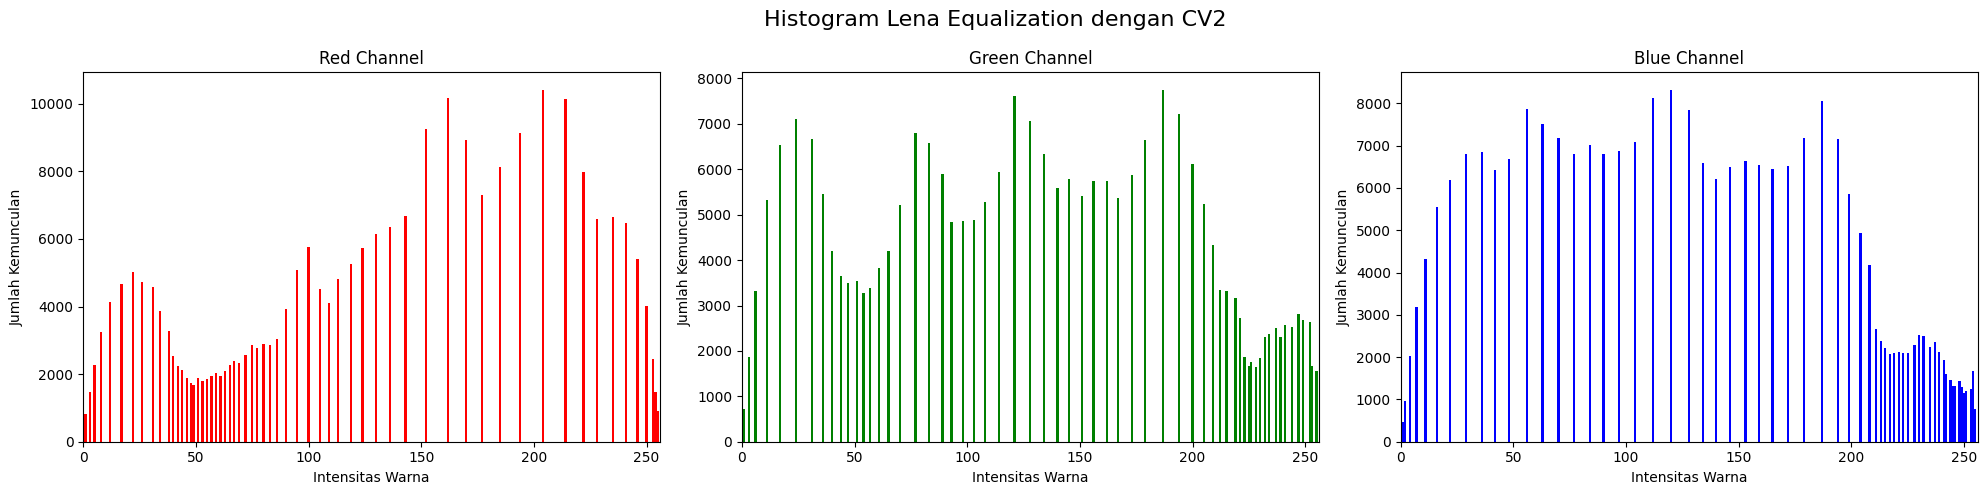

In [38]:
def histogram_equalization(img):
    # Konversi gambar dari BGR ke RGB
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Pisahkan setiap channel warna
    r_channel, g_channel, b_channel = cv.split(img_rgb)

    # Lakukan histogram equalization pada setiap channel warna
    r_eq = cv.equalizeHist(r_channel)
    g_eq = cv.equalizeHist(g_channel)
    b_eq = cv.equalizeHist(b_channel)

    # Gabungkan kembali setiap channel warna yang sudah diequalisasi
    img_eq = cv.merge([r_eq, g_eq, b_eq])

    # Konversi citra hasil equalization dari RGB ke BGR
    img_eq_bgr = cv.cvtColor(img_eq, cv.COLOR_RGB2BGR)

    return img_eq_bgr

img2_histeqed = histogram_equalization(lena_lc)

final_frame2 = cv.hconcat((lena_lc, img2_histeqed))
cv2_imshow(final_frame2)

# Menampilkan gambar histogram lena low contrast
histogram_image(lena_lc, "Histogram Lena Low Contrast")

# Menampilkan gambar histogram lena equalization dengan CV2
histogram_image(img2_histeqed, "Histogram Lena Equalization dengan CV2")

### 7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

In [ ]:
# Fungsi untuk menghitung jarak Euclidean antara dua warna
def color_distance(color1, color2):
    return np.sqrt(np.sum((color1 - color2) ** 2))

# Fungsi untuk memetakan warna ke dalam 8 warna yang ditentukan
def color_mapping(img):
    # Definisikan 8 warna target (hitam, hijau, kuning, biru, cyan, magenta, putih)
    colors = {
        "black": np.array([0, 0, 0]),
        "green": np.array([0, 255, 0]),
        "yellow": np.array([255, 255, 0]),
        "blue": np.array([0, 0, 255]),
        "cyan": np.array([0, 255, 255]),
        "magenta": np.array([255, 0, 255]),
        "white": np.array([255, 255, 255])
    }

    # Hasil gambar yang telah dipetakan
    mapped_image = np.zeros_like(img)

    # Iterasi melalui setiap piksel gambar
    height, width, _ = img.shape
    for y in range(height):
        for x in range(width):
            pixel_color = img[y, x]
            # Cari warna terdekat
            closest_color = None
            min_distance = float('inf')
            for color_name, color_value in colors.items():
                distance = color_distance(pixel_color, color_value)
                if distance < min_distance:
                    min_distance = distance
                    closest_color = color_value
            # Set warna terdekat pada gambar hasil
            mapped_image[y, x] = closest_color

    return mapped_image

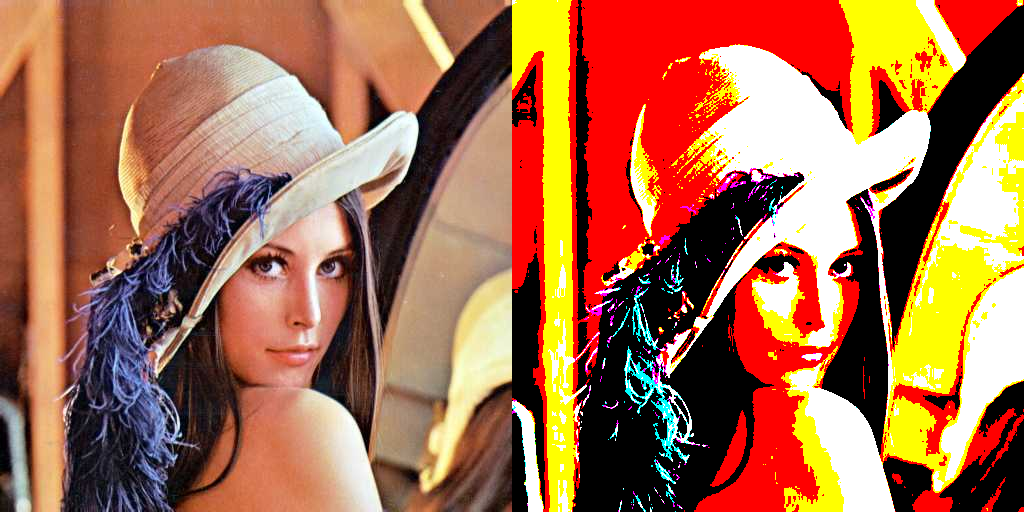

In [ ]:
# Terapkan pemetaan warna
mapped_img = color_mapping(original_img)

# Tampilkan gambar asli dan gambar yang telah dipetakan
final_frame = cv.hconcat((original_img, mapped_img))

# Use cv2_imshow instead of cv.imshow
cv2_imshow(final_frame)

### 8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

In [19]:
def dithering_floyd_steinberg(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Buat array kosong untuk citra hasil dithering
    img_dither = np.zeros_like(img)

    # Melakukan error diffusion Floyd pada setiap channel warna
    for y in range(img.shape[0]-1):
        for x in range(img.shape[1]-1):
            # Channel Red
            old_val_r = img[y,x,0]
            new_val_r = 255 if old_val_r > 127 else 0
            img_dither[y,x,0] = new_val_r
            error_r = old_val_r - new_val_r

            if x < img.shape[1]-1:
                img[y,x+1,0] += error_r * 7 / 16
            if x > 0 and y < img.shape[0]-1:
                img[y+1,x-1,0] += error_r * 3 / 16
            if y < img.shape[0]-1:
                img[y+1,x,0] += error_r * 5 / 16
            if x < img.shape[1]-1 and y < img.shape[0]-1:
                img[y+1,x+1,0] += error_r * 1 / 16

            # Channel Green
            old_val_g = img[y,x,1]
            new_val_g = 255 if old_val_g > 127 else 0
            img_dither[y,x,1] = new_val_g
            error_g = old_val_g - new_val_g

            if x < img.shape[1]-1:
                img[y,x+1,1] += error_g * 7 / 16
            if x > 0 and y < img.shape[0]-1:
                img[y+1,x-1,1] += error_g * 3 / 16
            if y < img.shape[0]-1:
                img[y+1,x,1] += error_g * 5 / 16
            if x < img.shape[1]-1 and y < img.shape[0]-1:
                img[y+1,x+1,1] += error_g * 1 / 16

            # Channel Blue
            old_val_b = img[y,x,2]
            new_val_b = 255 if old_val_b > 127 else 0
            img_dither[y,x,2] = new_val_b
            error_b = old_val_b - new_val_b

            if x < img.shape[1]-1:
                img[y,x+1,2] += error_b * 7 / 16
            if x > 0 and y < img.shape[0]-1:
                img[y+1,x-1,2] += error_b * 3 / 16
            if y < img.shape[0]-1:
                img[y+1,x,2] += error_b * 5 / 16
            if x < img.shape[1]-1 and y < img.shape[0]-1:
                img[y+1,x+1,2] += error_b * 1 / 16

    # Kembalikan citra hasil dithering ke BGR
    img_dither = cv.cvtColor(img_dither, cv.COLOR_RGB2BGR)

    return img_dither

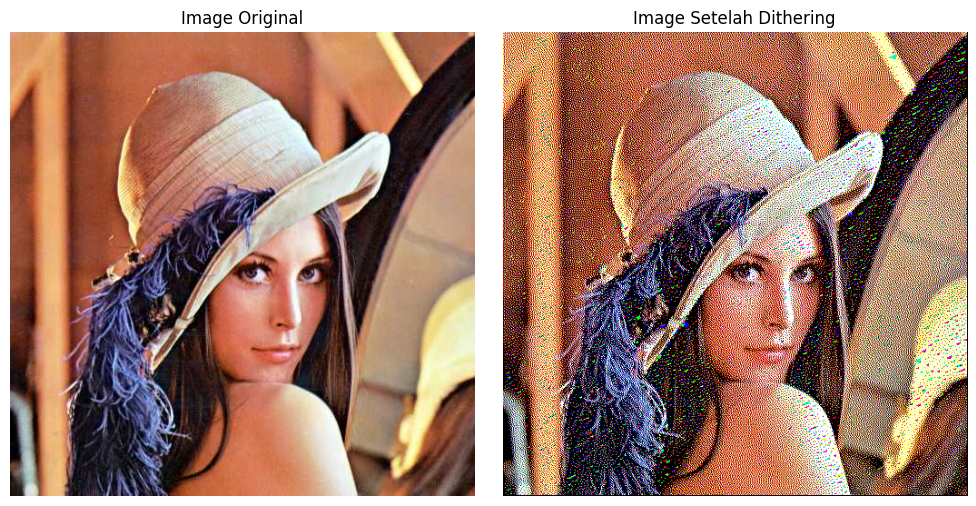

In [20]:
# Terapkan dithering
img_lena_dithered = dithering_floyd_steinberg(original_img)

plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title('Image Original')
plt.imshow(cv.cvtColor(original_img, cv.COLOR_BGR2RGB))  # Menggunakan img1
plt.axis('off')  # Matikan sumbu

# Gambar setelah dithering
plt.subplot(1, 2, 2)
plt.title('Image Setelah Dithering')
plt.imshow(cv.cvtColor(img_lena_dithered, cv.COLOR_BGR2RGB))  # Menggunakan img1_dithered
plt.axis('off')  # Matikan sumbu

plt.tight_layout()
plt.show()

### 9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

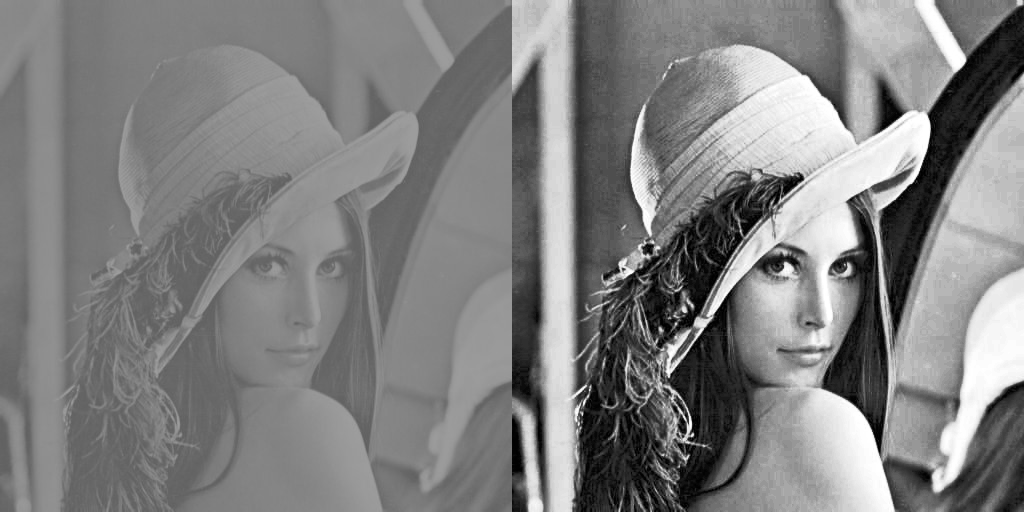

In [32]:
lena_lc_gray = cv.cvtColor(lena_lc, cv.COLOR_BGR2GRAY)
lena_lc_gray = cv.cvtColor(lena_lc_gray, cv.COLOR_GRAY2BGR)

lena_lc_gray_histeqed = histogram_equalization(lena_lc_gray)

final_frame5 = cv.hconcat((lena_lc_gray, lena_lc_gray_histeqed))
cv2_imshow(final_frame5)

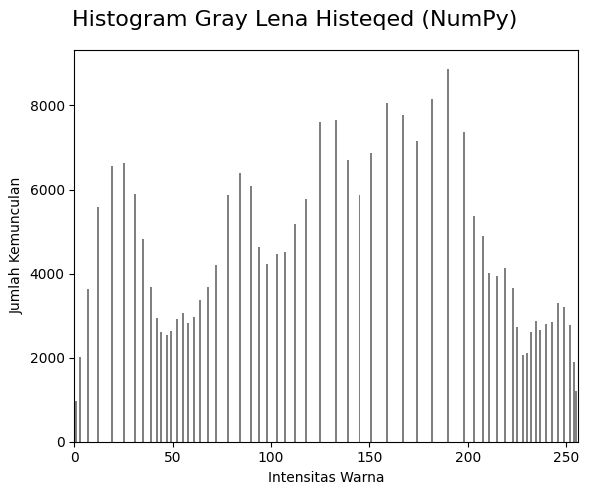

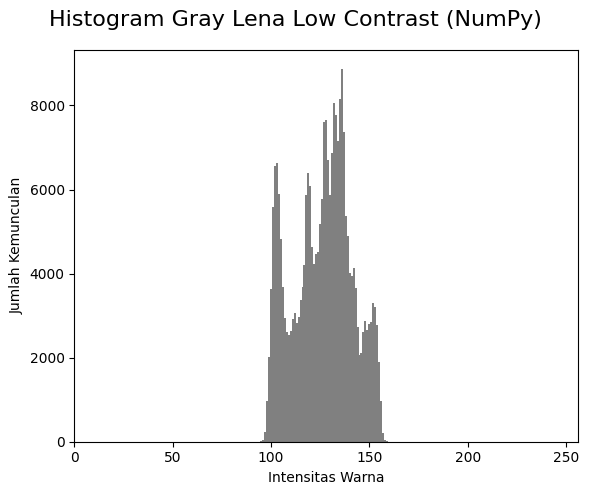

In [33]:
# Terapkan histogram equalization di sini jika belum diterapkan
lena_lc_gray = cv.cvtColor(lena_lc_gray, cv.COLOR_BGR2GRAY) # convert image to grayscale
lena_lc_gray_histeqed = cv.equalizeHist(lena_lc_gray)

# Panggil fungsi untuk menampilkan histogram
numpy_histogram_image(lena_lc_gray_histeqed, "Histogram Gray Lena Histeqed (NumPy)")

numpy_histogram_image(lena_lc_gray, "Histogram Gray Lena Low Contrast (NumPy)")



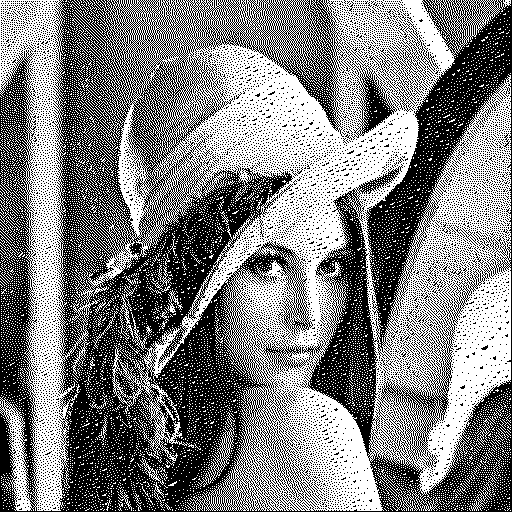

In [28]:
lena_lc_gray_histeqed_dithered = dithering_floyd_steinberg(lena_lc_gray_histeqed)
cv2_imshow(lena_lc_gray_histeqed_dithered)